# Importance Sampling Examples

In [1]:
from qmcpy import *
from numpy import *
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

## Game Example

In [2]:
payoff = lambda x: 10*(x.sum(1)>1.7)
abs_tol = .001

In [3]:
## Without Importance Sampling
distribution = IIDStdUniform(2)
measure = Uniform(distribution)
integral = QuickConstruct(measure,payoff)
solution1,data1 = MeanMC_g(integral,abs_tol=abs_tol).integrate()
data1

Solution: 0.4505         
QuickConstruct (Integrand Object)
IIDStdUniform (Discrete Distribution Object)
	dimension       2
	seed            None
	mimics          StdUniform
Uniform (True TrueMeasure Object)
	distrib_name    IIDStdUniform
	lower_bound     0
	upper_bound     1
MeanMC_g (Stopping Criterion Object)
	inflate         1.200
	alpha           0.010
	abs_tol         0.001
	rel_tol         0
	n_init          1024
	n_max           10000000000
MeanVarData (AccumulateData Object)
	levels          1
	solution        0.450
	n               50015195
	n_total         50016219
	confid_int      [ 0.449  0.451]
	time_integrate  2.080

In [4]:
# With Importance Sampling
p = 1
distribution = IIDStdUniform(2)
measure = Uniform(distribution)
integral = QuickConstruct(measure,lambda x: payoff(x**(1/(p+1))) / ((p+1)**2 * (x.prod(1))**(p/(p+1))))
solution2,data2 = MeanMC_g(integral,abs_tol=abs_tol).integrate()
data2

Solution: 0.4498         
QuickConstruct (Integrand Object)
IIDStdUniform (Discrete Distribution Object)
	dimension       2
	seed            None
	mimics          StdUniform
Uniform (True TrueMeasure Object)
	distrib_name    IIDStdUniform
	lower_bound     0
	upper_bound     1
MeanMC_g (Stopping Criterion Object)
	inflate         1.200
	alpha           0.010
	abs_tol         0.001
	rel_tol         0
	n_init          1024
	n_max           10000000000
MeanVarData (AccumulateData Object)
	levels          1
	solution        0.450
	n               13926141
	n_total         13927165
	confid_int      [ 0.449  0.451]
	time_integrate  0.856

In [5]:
print('Imporance Sampling takes %.3f the time and %.3f the samples'%\
     (data2.time_integrate/data1.time_integrate,data2.n_total/data1.n_total))

Imporance Sampling takes 0.411 the time and 0.278 the samples


## Asian Call Option Example

In [6]:
abs_tol = .02
n_plt = 32
dimension = 32
time_vector = [i/dimension for i in range(1,dimension+1)]

In [7]:
# Without Importance Sampling
distribution = IIDStdGaussian(dimension)
measure = BrownianMotion(distribution,time_vector)
integrand = AsianCall(measure)
solution1,data1 = MeanMC_g(integrand,abs_tol=abs_tol).integrate()
data1

Solution: 1.7826         
AsianCall (Integrand Object)
	volatility      0.500
	start_price     30
	strike_price    35
	interest_rate   0
	mean_type       arithmetic
	_dim_frac       0
IIDStdGaussian (Discrete Distribution Object)
	dimension       32
	seed            None
	mimics          StdGaussian
BrownianMotion (True TrueMeasure Object)
	distrib_name    IIDStdGaussian
	time_vector     [ 0.031  0.062  0.094 ...  0.938  0.969  1.000]
MeanMC_g (Stopping Criterion Object)
	inflate         1.200
	alpha           0.010
	abs_tol         0.020
	rel_tol         0
	n_init          1024
	n_max           10000000000
MeanVarData (AccumulateData Object)
	levels          1
	solution        1.783
	n               631626
	n_total         632650
	confid_int      [ 1.763  1.803]
	time_integrate  1.602

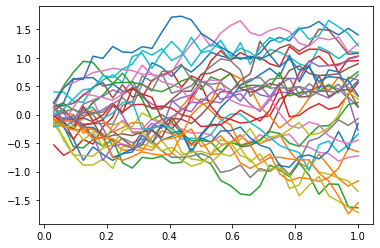

In [8]:
# Plot Samples
samples = measure.gen_mimic_samples(n_plt)
for i in range(n_plt):
    plt.plot(time_vector,samples[i])

In [9]:
# With Importance Sampling
mean_shift_is = 1
distribution = IIDStdGaussian(dimension)
measure = BrownianMotion(distribution,time_vector,mean_shift_is)
integrand = AsianCall(measure)
solution2,data2 = MeanMC_g(integrand,abs_tol=abs_tol).integrate()
data2

Solution: 1.7934         
AsianCall (Integrand Object)
	volatility      0.500
	start_price     30
	strike_price    35
	interest_rate   0
	mean_type       arithmetic
	_dim_frac       0
IIDStdGaussian (Discrete Distribution Object)
	dimension       32
	seed            None
	mimics          StdGaussian
BrownianMotion (True TrueMeasure Object)
	distrib_name    IIDStdGaussian
	time_vector     [ 0.031  0.062  0.094 ...  0.938  0.969  1.000]
MeanMC_g (Stopping Criterion Object)
	inflate         1.200
	alpha           0.010
	abs_tol         0.020
	rel_tol         0
	n_init          1024
	n_max           10000000000
MeanVarData (AccumulateData Object)
	levels          1
	solution        1.793
	n               171936
	n_total         172960
	confid_int      [ 1.773  1.813]
	time_integrate  0.771

(32, 32)


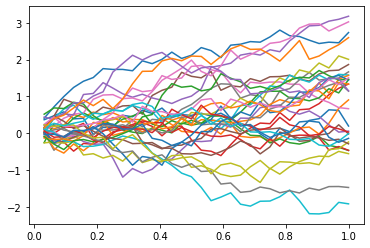

In [10]:
# Plot Samples
samples = measure.gen_mimic_samples(n_plt)
print(samples.shape)
for i in range(n_plt):
    plt.plot(time_vector,samples[i])

In [11]:
print('Imporance Sampling takes %.3f the time and %.3f the samples'%\
     (data2.time_integrate/data1.time_integrate,data2.n_total/data1.n_total))

Imporance Sampling takes 0.481 the time and 0.273 the samples


### Mean Shift Value Comparison

mean shift -0.5	 time 3.28	 samples 1736679
mean shift 0.0	 time 1.91	 samples 800220
mean shift 0.5	 time 1.08	 samples 284012
mean shift 1.0	 time 0.81	 samples 160095
mean shift 1.5	 time 0.81	 samples 155833
mean shift 2.0	 time 1.18	 samples 328725
mean shift 2.5	 time 1.32	 samples 401335
mean shift 3.0	 time 2.43	 samples 1125591


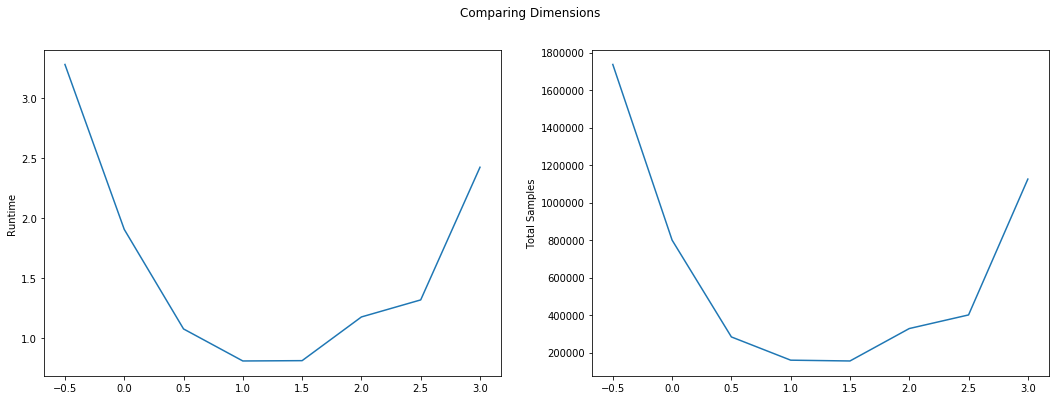

In [12]:
ms = arange(-.5,3.5,.5)
times = zeros(len(ms))
samples = zeros(len(ms))
for i in range(len(ms)):
    distribution = IIDStdGaussian(dimension)
    measure = BrownianMotion(distribution,time_vector,mean_shift_is=ms[i])
    integrand = AsianCall(measure)
    solution,data = MeanMC_g(integrand,abs_tol=abs_tol).integrate()
    times[i] = data.time_integrate
    samples[i] = data.n_total
    print('mean shift %.1f\t time %.2f\t samples %d'%(ms[i],times[i],samples[i]))
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(ms,times)
ax[0].set_ylabel('Runtime')
ax[1].set_ylabel('Total Samples')
ax[1].plot(ms,samples)
fig.suptitle('Comparing Dimensions')
plt.savefig('../outputs/importance_sampling/vary_mean_shift.png',dpi=200)